In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def inside_mask(mask, image):
    mask = np.stack([mask, mask, mask], axis=2)
    mask_image =mask*image
    return mask_image
def decoupage_texte2(lien):
    return lien.split("/")[-1],lien.split("/")[-2],lien.split("/")[-3]
def telecharger_jpg2(picture,num):
    cv2.imwrite("defile_vogue/tres_traitee/"+num+".png", cv2.cvtColor(picture, cv2.COLOR_RGBA2BGRA))

In [6]:
import cv2 
def open_image(location):
    image = cv2.imread(location,cv2.IMREAD_UNCHANGED )
    return image

def show_image(image):
    if image is not None:
        if image.shape[2] == 4:
            image=cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
        else:
            image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    else:
        print("Image is empty.")
    return image

def resize_image(image, target_size=(256, 256)):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)



def remove_transparent_pixels(image):
    # Check if image has an alpha channel
    if image.shape[2] == 4:
        non_transparent_pixels = image[image[:, :, 3] > 0]
        return non_transparent_pixels[:, :3]  # Discard the alpha channel
    else:
        return image


In [46]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

def extract_dominant_color(image, k=5):
    pixels = remove_transparent_pixels(image)
    pixels = pixels.reshape(-1, 3)

    # Apply k-means to find clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Find the most frequent cluster
    unique, counts = np.unique(kmeans.labels_, return_counts=True)
    
    color_freq_pairs = list(zip(kmeans.cluster_centers_, counts))
    color_freq_pairs.sort(key=lambda x: x[1], reverse=True)
    sorted_colors = [color for color, freq in color_freq_pairs]
    dominant_color= [[int(i) for i in t]for t in sorted_colors] 
    
    return dominant_color

from sklearn.cluster import KMeans, DBSCAN
import numpy as np

def extract_dominant_color_with_clustering(image, k=5, eps=5, min_samples=10):
    # Convertir l'image en un tableau de pixels
    pixels = remove_transparent_pixels(image)
    pixels = pixels.reshape(-1, 3)

    # Appliquer DBSCAN pour le clustering initial basé sur la densité
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pixels)

    # Filtrer les points non-clusterisés
    mask = labels != -1
    filtered_pixels = pixels[mask]

    # Si le nombre de clusters trouvés par DBSCAN est inférieur à k, appliquer K-means pour ajuster
    if len(np.unique(labels)) < k:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(filtered_pixels)
        labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_
    else:
        unique_labels = np.unique(labels)
        cluster_centers = np.array([filtered_pixels[labels == label].mean(axis=0) for label in unique_labels])

    # Compter les fréquences des clusters
    unique, counts = np.unique(labels, return_counts=True)
    color_freq_pairs = list(zip(cluster_centers, counts))
    color_freq_pairs.sort(key=lambda x: x[1], reverse=True)
    
    sorted_colors = [color for color, freq in color_freq_pairs]
    dominant_color = [[int(i) for i in t] for t in sorted_colors]

    return dominant_color




def extract_dominant_color_density(image, eps=10, min_samples=3):
    # Convertir l'image en un tableau de pixels (suppression de la transparence si nécessaire)
    pixels = remove_transparent_pixels(image)
    pixels = pixels.reshape(-1, 3)

    # Appliquer DBSCAN pour trouver les clusters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pixels)
    
    # Filtrer les points non-clusterisés (label = -1)
    mask = labels != -1
    filtered_pixels = pixels[mask]
    filtered_labels = labels[mask]

    # Calculer les centres de clusters
    unique_labels, counts = np.unique(filtered_labels, return_counts=True)
    cluster_centers = np.array([filtered_pixels[filtered_labels == label].mean(axis=0) for label in unique_labels])
    
    # Trier les couleurs dominantes en fonction de la fréquence
    color_freq_pairs = list(zip(cluster_centers, counts))
    color_freq_pairs.sort(key=lambda x: x[1], reverse=True)
    
    sorted_colors = [color for color, freq in color_freq_pairs]
    dominant_color = [[int(i) for i in t] for t in sorted_colors]
    
    return dominant_color


def numbers_dominant_color(image):
    pixels = remove_transparent_pixels(image)
    pixels = pixels.reshape(-1, 3)

    variance = []
    # Apply k-means to find clusters
    for k in range(1, 6):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pixels)
        variance.append(kmeans.inertia_)
        
    plt.plot(range(1, 6), variance, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Variance')
    plt.show()

def show_dominant_color(color):
    # Create a small image filled with the dominant color
    color_square = np.ones((100, 100, 3), dtype=np.uint8) * color.astype(np.uint8)
    
    # Display the color square
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(color_square,cv2.COLOR_BGRA2RGBA))
    plt.axis('off')
    plt.show()



(256, 256, 3)


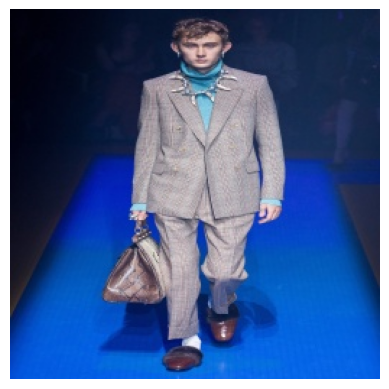

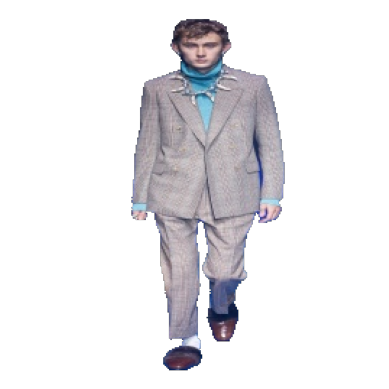

done


In [17]:
pic="2001"
chemin="defile_vogue/traitee/"+str(pic)+".jpg"
gf = open_image(chemin)
print(gf.shape)
gf=resize_image(gf)
show_image(gf)
chemin2="defile_vogue/tres_traitee/"+str(pic)+".png"
gf2 = open_image(chemin2)

gf2=resize_image(gf2)
show_image(gf2)
print("done")

In [48]:
rere=extract_dominant_color_mean_shift(gf2,3)
print(rere)
print(len(rere))


[[184, 178, 187], [174, 167, 175], [187, 181, 189], [169, 161, 170], [172, 165, 174], [171, 163, 171], [177, 170, 178], [187, 183, 193], [167, 160, 168], [182, 177, 184], [165, 158, 165], [177, 171, 181], [180, 174, 184], [190, 185, 192], [191, 187, 196], [181, 175, 181], [188, 183, 190], [163, 154, 162], [180, 173, 181], [179, 172, 178], [193, 189, 198], [193, 188, 195], [164, 157, 163], [180, 168, 176], [170, 170, 180], [159, 152, 161], [196, 192, 200], [195, 190, 197], [161, 153, 159], [177, 165, 168], [173, 160, 166], [196, 192, 203], [199, 195, 206], [199, 194, 202], [153, 146, 153], [157, 148, 156], [168, 157, 163], [156, 148, 159], [153, 146, 157], [151, 144, 154], [164, 152, 160], [158, 151, 158], [151, 143, 150], [188, 177, 183], [176, 161, 169], [203, 198, 207], [159, 147, 155], [170, 155, 162], [183, 172, 178], [166, 151, 158], [148, 140, 151], [162, 150, 158], [148, 140, 147], [144, 136, 142], [138, 129, 136], [151, 142, 148], [137, 128, 134], [160, 147, 151], [142, 134, 14

In [ ]:

len(rere)
rere=np.array(rere)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for u in range(len(rere)):
    
    color_square = np.ones((100, 100, 3), dtype=np.uint8) * rere[u].astype(np.uint8)
    axes[u].imshow(cv2.cvtColor(color_square, cv2.COLOR_BGRA2RGBA))

plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(gf2, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

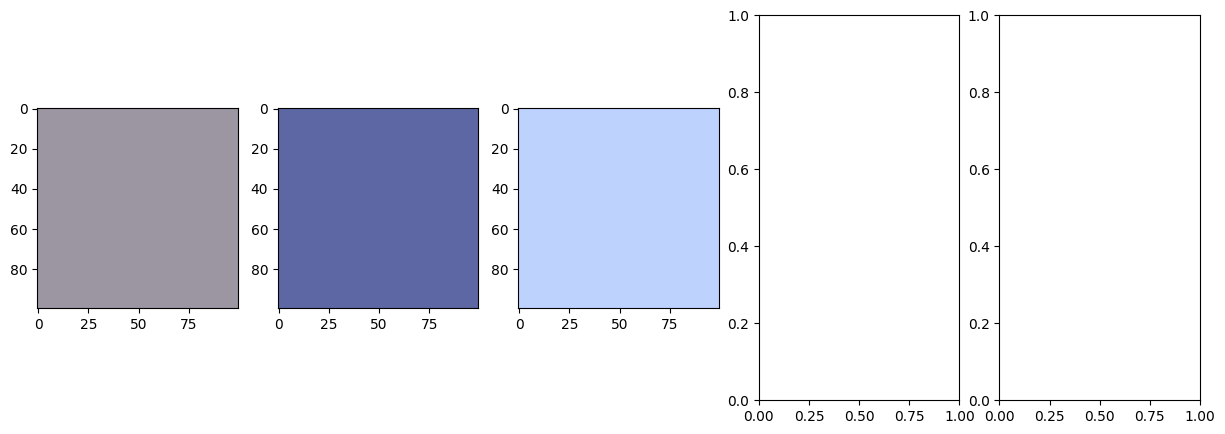

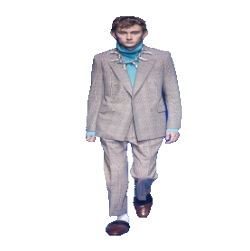

In [44]:
rere=extract_dominant_color_density(gf2,11,3)
print(rere)

len(rere)
rere=np.array(rere)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for u in range(len(rere)):
    
    color_square = np.ones((100, 100, 3), dtype=np.uint8) * rere[u].astype(np.uint8)
    axes[u].imshow(cv2.cvtColor(color_square, cv2.COLOR_BGRA2RGBA))

plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(gf2, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

[[184, 177, 184], [154, 141, 145], [95, 69, 69]]


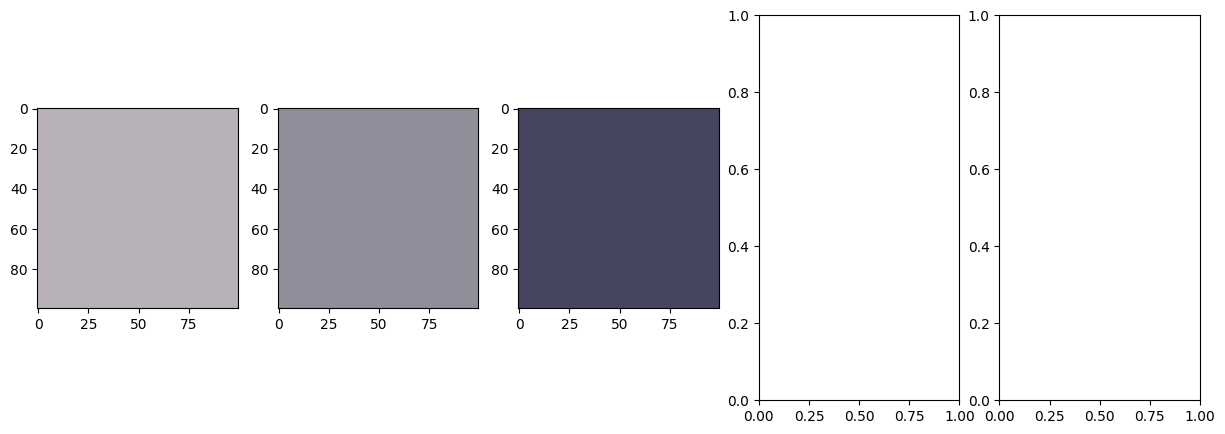

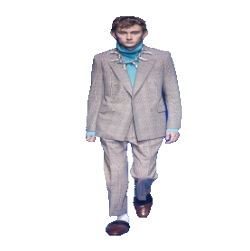

In [45]:
rere=extract_dominant_color(gf2,3)
print(rere)
rere=np.array(rere)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for u in range(len(rere)):
    
    color_square = np.ones((100, 100, 3), dtype=np.uint8) * rere[u].astype(np.uint8)
    axes[u].imshow(cv2.cvtColor(color_square, cv2.COLOR_BGRA2RGBA))

plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(gf2, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()